# Excersice 4

Feature selection:

1. You need to load the UCI Arrhythmia dataset
https://archive.ics.uci.edu/ml/datasets/arrhythmia
* the problem is a multi-class classification

2. For comparing the result you need to use kNN (k=3), and compare based on the accuracy with the original dataset (with the all features).

2. Run three different types of feature selection methods (Univariate Statistics, model based, and Iterative Feature Selection).
* The original data set has 279 features.
* You need to run the methods for number_of_features= 20, 50, 100, 150, 200
* All the results should show in the same figure (At the end we have just one figure)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [3]:
df.shape

(452, 280)

In [4]:
#df[df.isnull().any(axis=1)]
df.isnull().values.any()

False

In [5]:
# Split the frame as X and y
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

# Siince the dataset has '?' (missing) values, let's replace these by NaN
features = features.replace('?', np.NaN)
features.isnull().sum().sum() # check if we have NaN values now
features.columns[features.isna().any()].tolist() # whiich columns have missing values

[10, 11, 12, 13, 14]

In [6]:
target.value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: 279, dtype: int64

In [7]:
# remove columns having >50% missing values.
valueless_cols = len(features) * 0.5
features.dropna(thresh = valueless_cols, axis = 1, inplace = True)
features.columns[features.isna().any()].tolist() # whiich columns now have missing values

[10, 11, 12, 14]

In [8]:
# Replace rest of the missing values 
impute_med = SimpleImputer(missing_values=np.NaN, strategy='median') # impute by median values in columns
imputer = impute_med.fit(features)
df_imp = imputer.transform(features)
features = pd.DataFrame(df_imp)
features.columns[features.isna().any()].tolist() # which columns now have missing values

[]

In [9]:
# define X,y and train-test-split
X=features.values
y=target.values

Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. This is called a stratified train-test split. We can achieve this by setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

In [10]:
# train-test-split using stratified y option
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, stratify = target, random_state=63)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((339, 278), (339,), (113, 278), (113,))

For comparing the result you need to use kNN (k=3), and compare based on the accuracy with the original dataset (with the all features).
Run three different types of feature selection methods (Univariate Statistics, model based, and Iterative Feature Selection).
The original data set has 279 features.
You need to run the methods for number_of_features= 20, 50, 100, 150, 200
All the results should show in the same figure (At the end we have just one figure)

In [11]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Train score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test score: {:.2f}".format(knn.score(X_test, y_test)))

Train score: 0.73
Test score: 0.63


# I have tested preprocessing (scaliing) for this data, but it didn't improve the score. Therefore, will continue this dataset without scaling

# Univariate Statistics

X_train.shape: (339, 278)
X_train_selected.shape: (339, 20)
              precision    recall  f1-score   support

           1       0.60      0.97      0.74        61
           2       1.00      0.27      0.43        11
           3       1.00      0.75      0.86         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.33      0.17      0.22         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         2
          10       1.00      0.23      0.38        13
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         5

    accuracy                           0.63       113
   macro avg       0.38      0.26      0.28       113
weighted avg       0.61      0.63      0.55       113

[[59  0  0  0  0  2

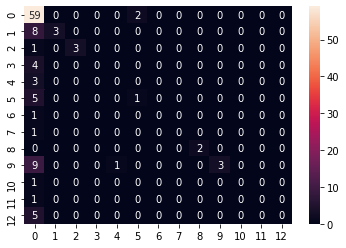

In [12]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=7)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))
model_preds = knn.predict(X_test)
print(classification_report(y_test, model_preds))
cm=confusion_matrix(y_test, model_preds)
print(cm)
sns.heatmap(cm, annot=True)

Text(0.5, 0, 'Sample index')

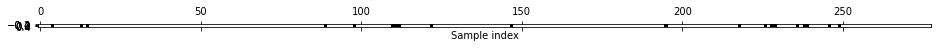

In [13]:
mask = select.get_support()
#print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

Score with all features: 0.628
Score with only selected features: 0.628
              precision    recall  f1-score   support

           1       0.63      0.93      0.75        61
           2       0.25      0.09      0.13        11
           3       0.75      0.75      0.75         4
           4       0.50      0.25      0.33         4
           5       0.00      0.00      0.00         3
           6       0.67      0.33      0.44         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.75      0.46      0.57        13
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         5

    accuracy                           0.63       113
   macro avg       0.35      0.26      0.28       113
weighted avg       0.55      0.63      0.56       113

[[57  3

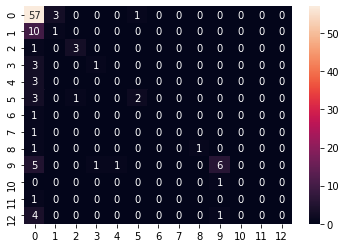

In [14]:
X_test_selected = select.transform(X_test)
knn.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(knn.score(X_test, y_test)))
knn.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(knn.score(X_test_selected, y_test)))

model_preds_selected = knn.predict(X_test_selected)
print(classification_report(y_test, model_preds_selected))
cm_selected=confusion_matrix(y_test, model_preds_selected)
print(cm_selected)
sns.heatmap(cm_selected, annot=True)

X_train.shape: (339, 278)
X_train_selected.shape: (339, 20)
Score with all features: 0.628
Score with only selected features: 0.628
X_train.shape: (339, 278)
X_train_selected.shape: (339, 50)
Score with all features: 0.628
Score with only selected features: 0.628
X_train.shape: (339, 278)
X_train_selected.shape: (339, 100)
Score with all features: 0.628
Score with only selected features: 0.584
X_train.shape: (339, 278)
X_train_selected.shape: (339, 150)
Score with all features: 0.628
Score with only selected features: 0.637
X_train.shape: (339, 278)
X_train_selected.shape: (339, 200)
Score with all features: 0.628
Score with only selected features: 0.637
X_train.shape: (339, 278)
X_train_selected.shape: (339, 278)
Score with all features: 0.628
Score with only selected features: 0.628


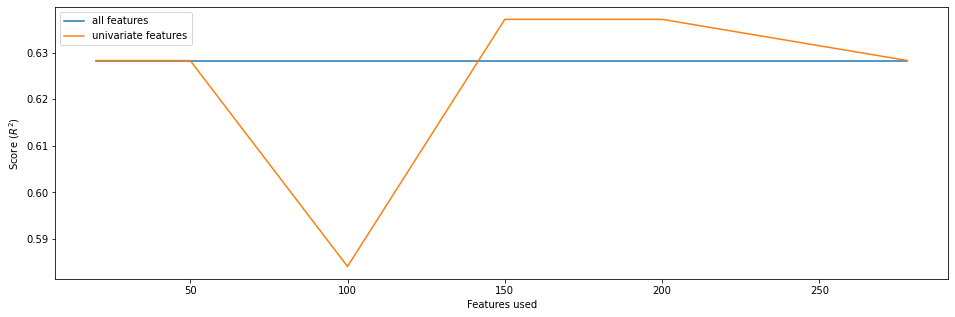

In [15]:
orig_accuracy_univariate = []
percentile_accuracy_univariate = []
features_used = []
percent_settings = [7, 18, 36, 54, 72, 100]
for n in percent_settings:
# build the model
    select = SelectPercentile(percentile=n)
    select.fit(X_train, y_train)
    X_train_selected = select.transform(X_train)
    print("X_train.shape: {}".format(X_train.shape))
    print("X_train_selected.shape: {}".format(X_train_selected.shape))
    features_used.append(X_train_selected.shape[1])
    X_test_selected = select.transform(X_test)
    knn.fit(X_train, y_train)
    print("Score with all features: {:.3f}".format(knn.score(X_test, y_test)))
    orig_accuracy_univariate.append(knn.score(X_test, y_test))
    knn.fit(X_train_selected, y_train)
    print("Score with only selected features: {:.3f}".format(knn.score(X_test_selected, y_test)))
    percentile_accuracy_univariate.append(knn.score(X_test_selected, y_test))

    
def plot_univariate_percentile():
    plt.figure(figsize=(16,5))
    plt.plot(features_used, orig_accuracy_univariate, label="all features")
    plt.plot(features_used, percentile_accuracy_univariate, label="univariate features")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("Features used")
    plt.legend()

plot_univariate_percentile()

# Iterative Feature Selection

# This code, written for KNN, doesn't run 

from sklearn.feature_selection import RFE
select = RFE(estimator=knn, n_features_to_select=40)
select.fit(X_train, y_train)
X_train_model = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_model.shape))
X_test_model = select.transform(X_test)
score = knn.fit(X_train_model, y_train).score(X_test_model, y_test)
print("Test score: {:.3f}".format(score))

# Running this iterative feature selection using random forest classifier

# First, let's define suitable parameters using these features
# This is time consuming, so I'll go with only n_estimator parameter tuning in the next cell
newer_grid = [{'n_estimators': [50, 100, 150, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [16, 20, 24], 'min_samples_split': [2, 4, 8],
    'criterion' :['gini', 'entropy']}]
gridsearch = GridSearchCV(estimator=RandomForestClassifier(), 
                          param_grid=newer_grid, 
                          scoring='accuracy', 
                          cv=5)
gridsearch.fit(X_train, y_train)
print(gridsearch.score(X_test, y_test))
print(gridsearch.best_params_)

Training set score: 1.00
Test set score: 0.72
Training set score: 1.00
Test set score: 0.73
Training set score: 1.00
Test set score: 0.73
Training set score: 1.00
Test set score: 0.71
Training set score: 1.00
Test set score: 0.71


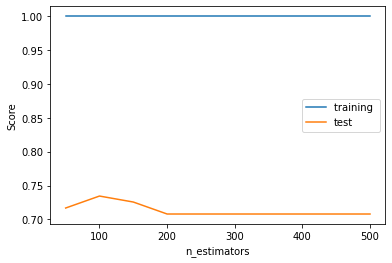

In [16]:
training_accuracy = []
test_accuracy = []
n_estimators = [50, 100, 150, 200, 500]
for n in n_estimators:
# build the model
    rf = RandomForestClassifier(n_estimators=n, random_state=42).fit(X_train, y_train)
# record training set accuracy
    training_accuracy.append(rf.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(rf.score(X_test, y_test))
    print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))

plt.plot(n_estimators, training_accuracy, label="training ")
plt.plot(n_estimators, test_accuracy, label="test")
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.legend()

In [17]:
# Since n_estimator 100 scored the best for test set, let's use this. Also, setting couuple of other parameters based on gridSearchCV run above
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=20, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Train score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test score: {:.2f}".format(rf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.73


Text(0.5, 0, 'Sample index')

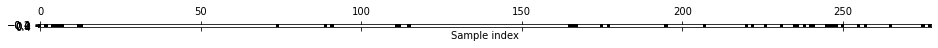

In [18]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=40)
select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

X_train.shape: (339, 278)
X_train_selected.shape: (339, 20)
Score with all features: 0.735
Score with only selected features: 0.735
X_train.shape: (339, 278)
X_train_selected.shape: (339, 50)
Score with all features: 0.735
Score with only selected features: 0.717
X_train.shape: (339, 278)
X_train_selected.shape: (339, 100)
Score with all features: 0.735
Score with only selected features: 0.726
X_train.shape: (339, 278)
X_train_selected.shape: (339, 150)
Score with all features: 0.735
Score with only selected features: 0.735
X_train.shape: (339, 278)
X_train_selected.shape: (339, 200)
Score with all features: 0.735
Score with only selected features: 0.699
X_train.shape: (339, 278)
X_train_selected.shape: (339, 278)
Score with all features: 0.735
Score with only selected features: 0.735


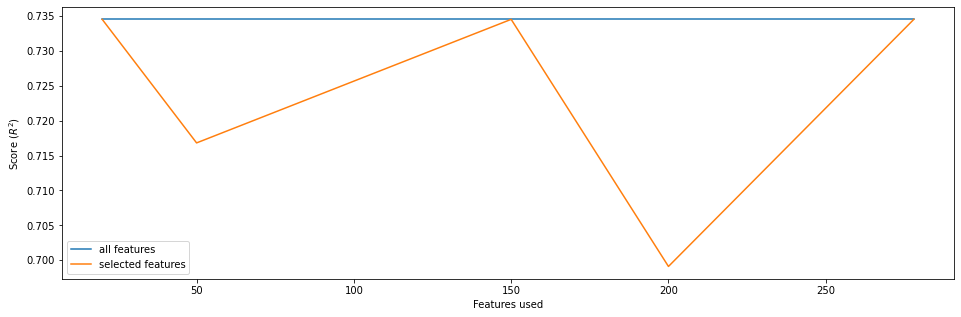

In [19]:
orig_accuracy_rfe = []
selected_feature_accuracy_rfe = []
features_used = []
feature_numbers = [20, 50, 100, 150, 200, 278]
for n in feature_numbers:
# build the model
    select = RFE(RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=20, random_state=42), n_features_to_select=n)
    select.fit(X_train, y_train)
    X_train_selected = select.transform(X_train)
    print("X_train.shape: {}".format(X_train.shape))
    print("X_train_selected.shape: {}".format(X_train_selected.shape))
    features_used.append(X_train_selected.shape[1])
    X_test_selected = select.transform(X_test)
    rf.fit(X_train, y_train)
    print("Score with all features: {:.3f}".format(rf.score(X_test, y_test)))
    orig_accuracy_rfe.append(rf.score(X_test, y_test))
    rf.fit(X_train_selected, y_train)
    print("Score with only selected features: {:.3f}".format(rf.score(X_test_selected, y_test)))
    selected_feature_accuracy_rfe.append(rf.score(X_test_selected, y_test))

    
def plot_iterative_features():
    plt.figure(figsize=(16,5))
    plt.plot(features_used, orig_accuracy_rfe, label="all features")
    plt.plot(features_used, selected_feature_accuracy_rfe, label="selected features")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("Features used")
    plt.legend()

plot_iterative_features()

# model based feature selection

# This code, written for KNN, doesn't run 

from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(estimator=knn)
select.fit(X_train, y_train)
X_train_model = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_model.shape))
X_test_model = select.transform(X_test)
score = knn.fit(X_train_model, y_train).score(X_test_model, y_test)
print("Test score: {:.3f}".format(score))

The instructor asked for the KNN, which doesn't expose "coef_" or "feature_importances_" attributes. Therefore, I chose another model for this task and the next one.

In [20]:
# The codes below should be helpful in determining which classifiers should be optimum for this problem
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm.classes import OneClassSVM
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier    
from sklearn.gaussian_process.gpc import GaussianProcessClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture

classifiers = [ExtraTreeClassifier, DecisionTreeClassifier, OneClassSVM, MLPClassifier, RadiusNeighborsClassifier,          
               KNeighborsClassifier, # OutputCodeClassifier, OneVsOneClassifier, OneVsRestClassifier,            
               SGDClassifier, RidgeClassifierCV, RidgeClassifier, PassiveAggressiveClassifier, 
               GaussianProcessClassifier, AdaBoostClassifier, GradientBoostingClassifier, 
               BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, BernoulliNB, CalibratedClassifierCV, 
               GaussianNB, LabelPropagation, LabelSpreading, LinearDiscriminantAnalysis, LinearSVC, 
               LogisticRegression, LogisticRegressionCV, MultinomialNB,   NearestCentroid, NuSVC, Perceptron, 
               QuadraticDiscriminantAnalysis, SVC, GaussianMixture]

for cl in classifiers:
    msg = ''
    try:
        c = cl().fit(np.random.rand(10,10), np.random.randint(0, 2, size=10))
    except Exception as ex:
        msg = ': ' + str(ex)
        pass
        
    try:
        c.coef_
    except:
        try: 
            c.feature_importances_
        except:
            print('-', c.__class__.__name__, msg)
            continue
    print('+', c.__class__.__name__)

+ ExtraTreeClassifier
+ DecisionTreeClassifier
- OneClassSVM 
- MLPClassifier 
- RadiusNeighborsClassifier 
- KNeighborsClassifier 
+ SGDClassifier
+ RidgeClassifierCV
+ RidgeClassifier
+ PassiveAggressiveClassifier
- GaussianProcessClassifier 
+ AdaBoostClassifier
+ GradientBoostingClassifier
- BaggingClassifier 
+ ExtraTreesClassifier
+ RandomForestClassifier
+ BernoulliNB
- CalibratedClassifierCV 
- GaussianNB 
- LabelPropagation 
- LabelSpreading 
+ LinearDiscriminantAnalysis
+ LinearSVC
+ LogisticRegression
+ LogisticRegressionCV
+ MultinomialNB
- NearestCentroid 
- NuSVC 
+ Perceptron
- QuadraticDiscriminantAnalysis 
- SVC 
- GaussianMixture 


In [21]:
# Let's run model based feature selection using random forest classifier
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(estimator=rf)
select.fit(X_train, y_train)
X_train_model = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_model.shape))
X_test_model = select.transform(X_test)
score = rf.fit(X_train_model, y_train).score(X_test_model, y_test)
print("Test score: {:.3f}".format(score))

X_train.shape: (339, 278)
X_train_l1.shape: (339, 120)
Test score: 0.735


X_train.shape: (339, 278)
X_train_selected.shape: (339, 20)
Score with all features: 0.735
Score with only selected features: 0.726
X_train.shape: (339, 278)
X_train_selected.shape: (339, 50)
Score with all features: 0.735
Score with only selected features: 0.743
X_train.shape: (339, 278)
X_train_selected.shape: (339, 100)
Score with all features: 0.735
Score with only selected features: 0.726
X_train.shape: (339, 278)
X_train_selected.shape: (339, 150)
Score with all features: 0.735
Score with only selected features: 0.735
X_train.shape: (339, 278)
X_train_selected.shape: (339, 200)
Score with all features: 0.735
Score with only selected features: 0.743
X_train.shape: (339, 278)
X_train_selected.shape: (339, 278)
Score with all features: 0.735
Score with only selected features: 0.735


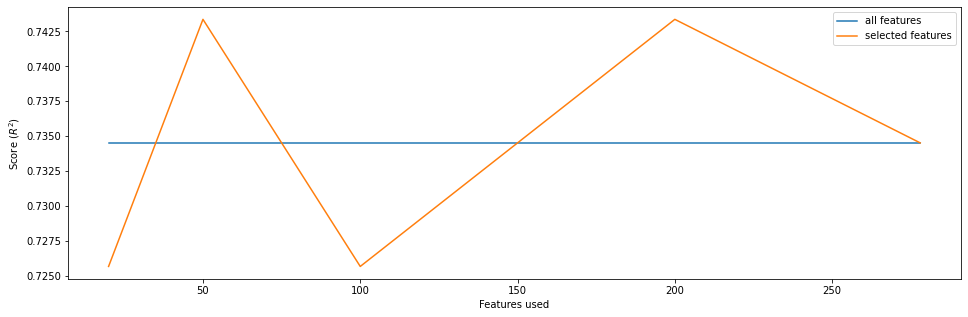

In [22]:
orig_accuracy_model = []
selected_feature_accuracy_model = []
features_used = []
feature_numbers = [20, 50, 100, 150, 200, 278]
for n in feature_numbers:
# build the model
    select = SelectFromModel(rf, threshold=-np.inf, max_features=n)
    select.fit(X_train, y_train)
    X_train_selected = select.transform(X_train)
    print("X_train.shape: {}".format(X_train.shape))
    print("X_train_selected.shape: {}".format(X_train_selected.shape))
    features_used.append(X_train_selected.shape[1])
    X_test_selected = select.transform(X_test)
    rf.fit(X_train, y_train)
    print("Score with all features: {:.3f}".format(rf.score(X_test, y_test)))
    orig_accuracy_model.append(rf.score(X_test, y_test))
    rf.fit(X_train_selected, y_train)
    print("Score with only selected features: {:.3f}".format(rf.score(X_test_selected, y_test)))
    selected_feature_accuracy_model.append(rf.score(X_test_selected, y_test))

    
def plot_model_based_feature_selection():
    plt.figure(figsize=(16,5))
    plt.plot(features_used, orig_accuracy_model, label="all features")
    plt.plot(features_used, selected_feature_accuracy_model, label="selected features")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("Features used")
    plt.legend()

plot_model_based_feature_selection()

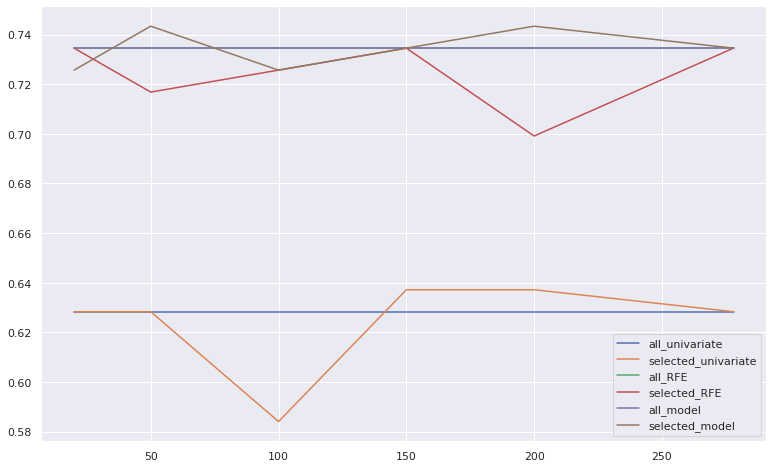

In [23]:
#plt.figure(figsize=(16,8))
sns.set(rc={'figure.figsize':(13,8)})
sns.lineplot(x=features_used, y=orig_accuracy_univariate, label="all_univariate")
sns.lineplot(x=features_used, y=percentile_accuracy_univariate, label="selected_univariate")
sns.lineplot(x=features_used, y=orig_accuracy_rfe, label="all_RFE")
sns.lineplot(x=features_used, y=selected_feature_accuracy_rfe, label="selected_RFE")
sns.lineplot(x=features_used, y=orig_accuracy_model, label="all_model")
sns.lineplot(x=features_used, y=selected_feature_accuracy_model, label="selected_model")


In [24]:
# Let's define a data frame using all the scores
df = pd.DataFrame({"all_univariate": orig_accuracy_univariate,
                 "selected_univariate" : percentile_accuracy_univariate,
                 "all_RFE": orig_accuracy_rfe,
                "selected_RFE": selected_feature_accuracy_rfe,
                   "all_model": orig_accuracy_model,
                   "selected_model": selected_feature_accuracy_model})
df.index=features_used
df

,all_univariate,selected_univariate,all_RFE,selected_RFE,all_model,selected_model
20,0.628319,0.628319,0.734513,0.734513,0.734513,0.725664
50,0.628319,0.628319,0.734513,0.716814,0.734513,0.743363
100,0.628319,0.584071,0.734513,0.725664,0.734513,0.725664
150,0.628319,0.637168,0.734513,0.734513,0.734513,0.734513
200,0.628319,0.637168,0.734513,0.699115,0.734513,0.743363
278,0.628319,0.628319,0.734513,0.734513,0.734513,0.734513


Text(0, 0.5, 'Score')

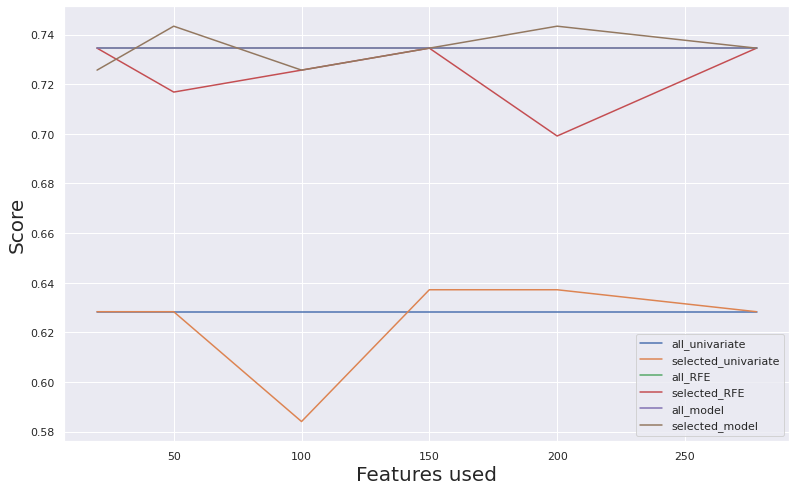

In [25]:
# Now plot them altogether in one figure
f, ax = plt.subplots(1, 1)
ax=sns.lineplot(x=df.index, y=orig_accuracy_univariate, label="all_univariate", data=df)
ax=sns.lineplot(x=features_used, y=percentile_accuracy_univariate, label="selected_univariate")
ax=sns.lineplot(x=features_used, y=orig_accuracy_rfe, label="all_RFE")
ax=sns.lineplot(x=features_used, y=selected_feature_accuracy_rfe, label="selected_RFE")
ax=sns.lineplot(x=features_used, y=orig_accuracy_model, label="all_model")
ax=sns.lineplot(x=features_used, y=selected_feature_accuracy_model, label="selected_model")
ax.set_xlabel("Features used", fontsize = 20)
ax.set_ylabel("Score", fontsize = 20)

# If a model has hundreds of features (e.g. this arrythmia dataset), we can use less number of features without compromising the score significantly. Here, in this plot, using 20 to 50 features doesn't look bad (although featires 150-200 looks even better). Therefore, using only 20 to 50 features might make the model very fast to run.